In [1]:
#importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Reading file nfl_games
Path = r'C:\Users\Dhwani\DataScienceHW7\data\raw\spi_matches.csv'
df = pd.read_csv(Path)
df.head()

date  league_id                   league          team1  \
0  2016-08-12       1843           French Ligue 1         Bastia   
1  2016-08-12       1843           French Ligue 1      AS Monaco   
2  2016-08-13       2411  Barclays Premier League      Hull City   
3  2016-08-13       2411  Barclays Premier League        Burnley   
4  2016-08-13       2411  Barclays Premier League  Middlesbrough   

                 team2   spi1   spi2   prob1   prob2  probtie     ...      \
0  Paris Saint-Germain  51.16  85.68  0.0463  0.8380   0.1157     ...       
1             Guingamp  68.85  56.48  0.5714  0.1669   0.2617     ...       
2       Leicester City  53.57  66.81  0.3459  0.3621   0.2921     ...       
3         Swansea City  58.98  59.74  0.4482  0.2663   0.2854     ...       
4           Stoke City  56.32  60.35  0.4380  0.2692   0.2927     ...       

   importance1  importance2  score1  score2   xg1   xg2  nsxg1  nsxg2  \
0         32.4         67.7     0.0     1.0  0.97  0.63   0.43   0.45   
1         53.7         22.9     2.0     2.0  2.45  0.77   1.75   0.42   
2         38.1         22.2     2.0     1.0  0.85  2.77   0.17   1.25   
3         36.5         29.1     0.0     1.0  1.24  1.84   1.71   1.56   
4         33.9         32.5     1.0     1.0  1.40  0.55   1.13   1.06   

   adj_score1  adj_score2  
0        0.00        1.05  
1        2.10        2.10  
2        2.10        1.05  
3        0.00        1.05  
4        1.05        1.05  

[5 rows x 22 columns]

In [3]:
df.columns

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [4]:
df["league"].value_counts().head(10).index

Index(['Barclays Premier League', 'French Ligue 1', 'Spanish Primera Division',
       'Italy Serie A', 'English League Championship',
       'Spanish Segunda Division', 'German Bundesliga', 'Italy Serie B',
       'Major League Soccer', 'Brasileiro Série A'],
      dtype='object')

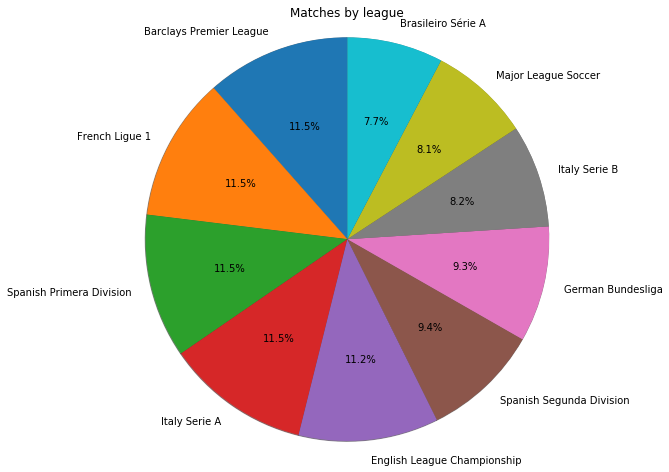

In [5]:
# Data to plot
labels = df["league"].value_counts().head(10).index
sizes = df["league"].value_counts().head(10)
colors = "k"*df["league"].nunique()

plt.figure(figsize=(8,8))
 
# Plot
plt.pie(sizes,
        labels=labels,
        shadow=True, 
        startangle=90,
        radius = 10.2, 
        autopct = '%1.1f%%')

plt.title('Matches by league')
plt.axis('equal')
plt.show()

In [6]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])
df['year']=df["date"].dt.year

In [7]:
df['year'].unique()

array([2016, 2017, 2018, 2019], dtype=int64)

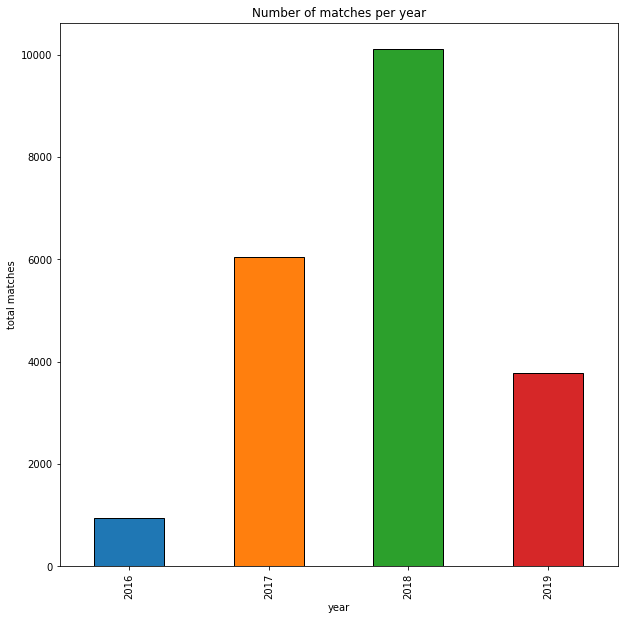

In [8]:
df.groupby("year")["league"].count().plot(kind="bar",
                                                    figsize = (10,10),
                                                            edgecolor = "k",
                                                            linewidth =1 )
plt.title("Number of matches per year")
plt.ylabel("total matches")
plt.show()

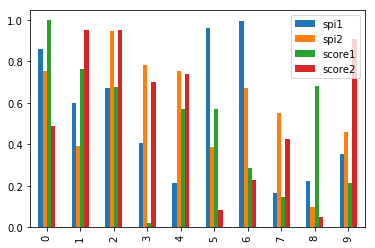

In [9]:
#df.plot(x='year',y='league_id',style='_')
df1 = pd.DataFrame(np.random.rand(10, 4), columns=['spi1', 'spi2', 'score1','score2'])
df1.plot.bar();

In [10]:
df.isna().sum()

date               0
league_id          0
league             0
team1              0
team2              0
spi1               0
spi2               0
prob1              0
prob2              0
probtie            0
proj_score1        0
proj_score2        0
importance1     9129
importance2     9129
score1          5260
score2          5260
xg1            11561
xg2            11561
nsxg1          11561
nsxg2          11561
adj_score1     11561
adj_score2     11561
year               0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isna().sum()

date           0
league_id      0
league         0
team1          0
team2          0
spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
year           0
dtype: int64

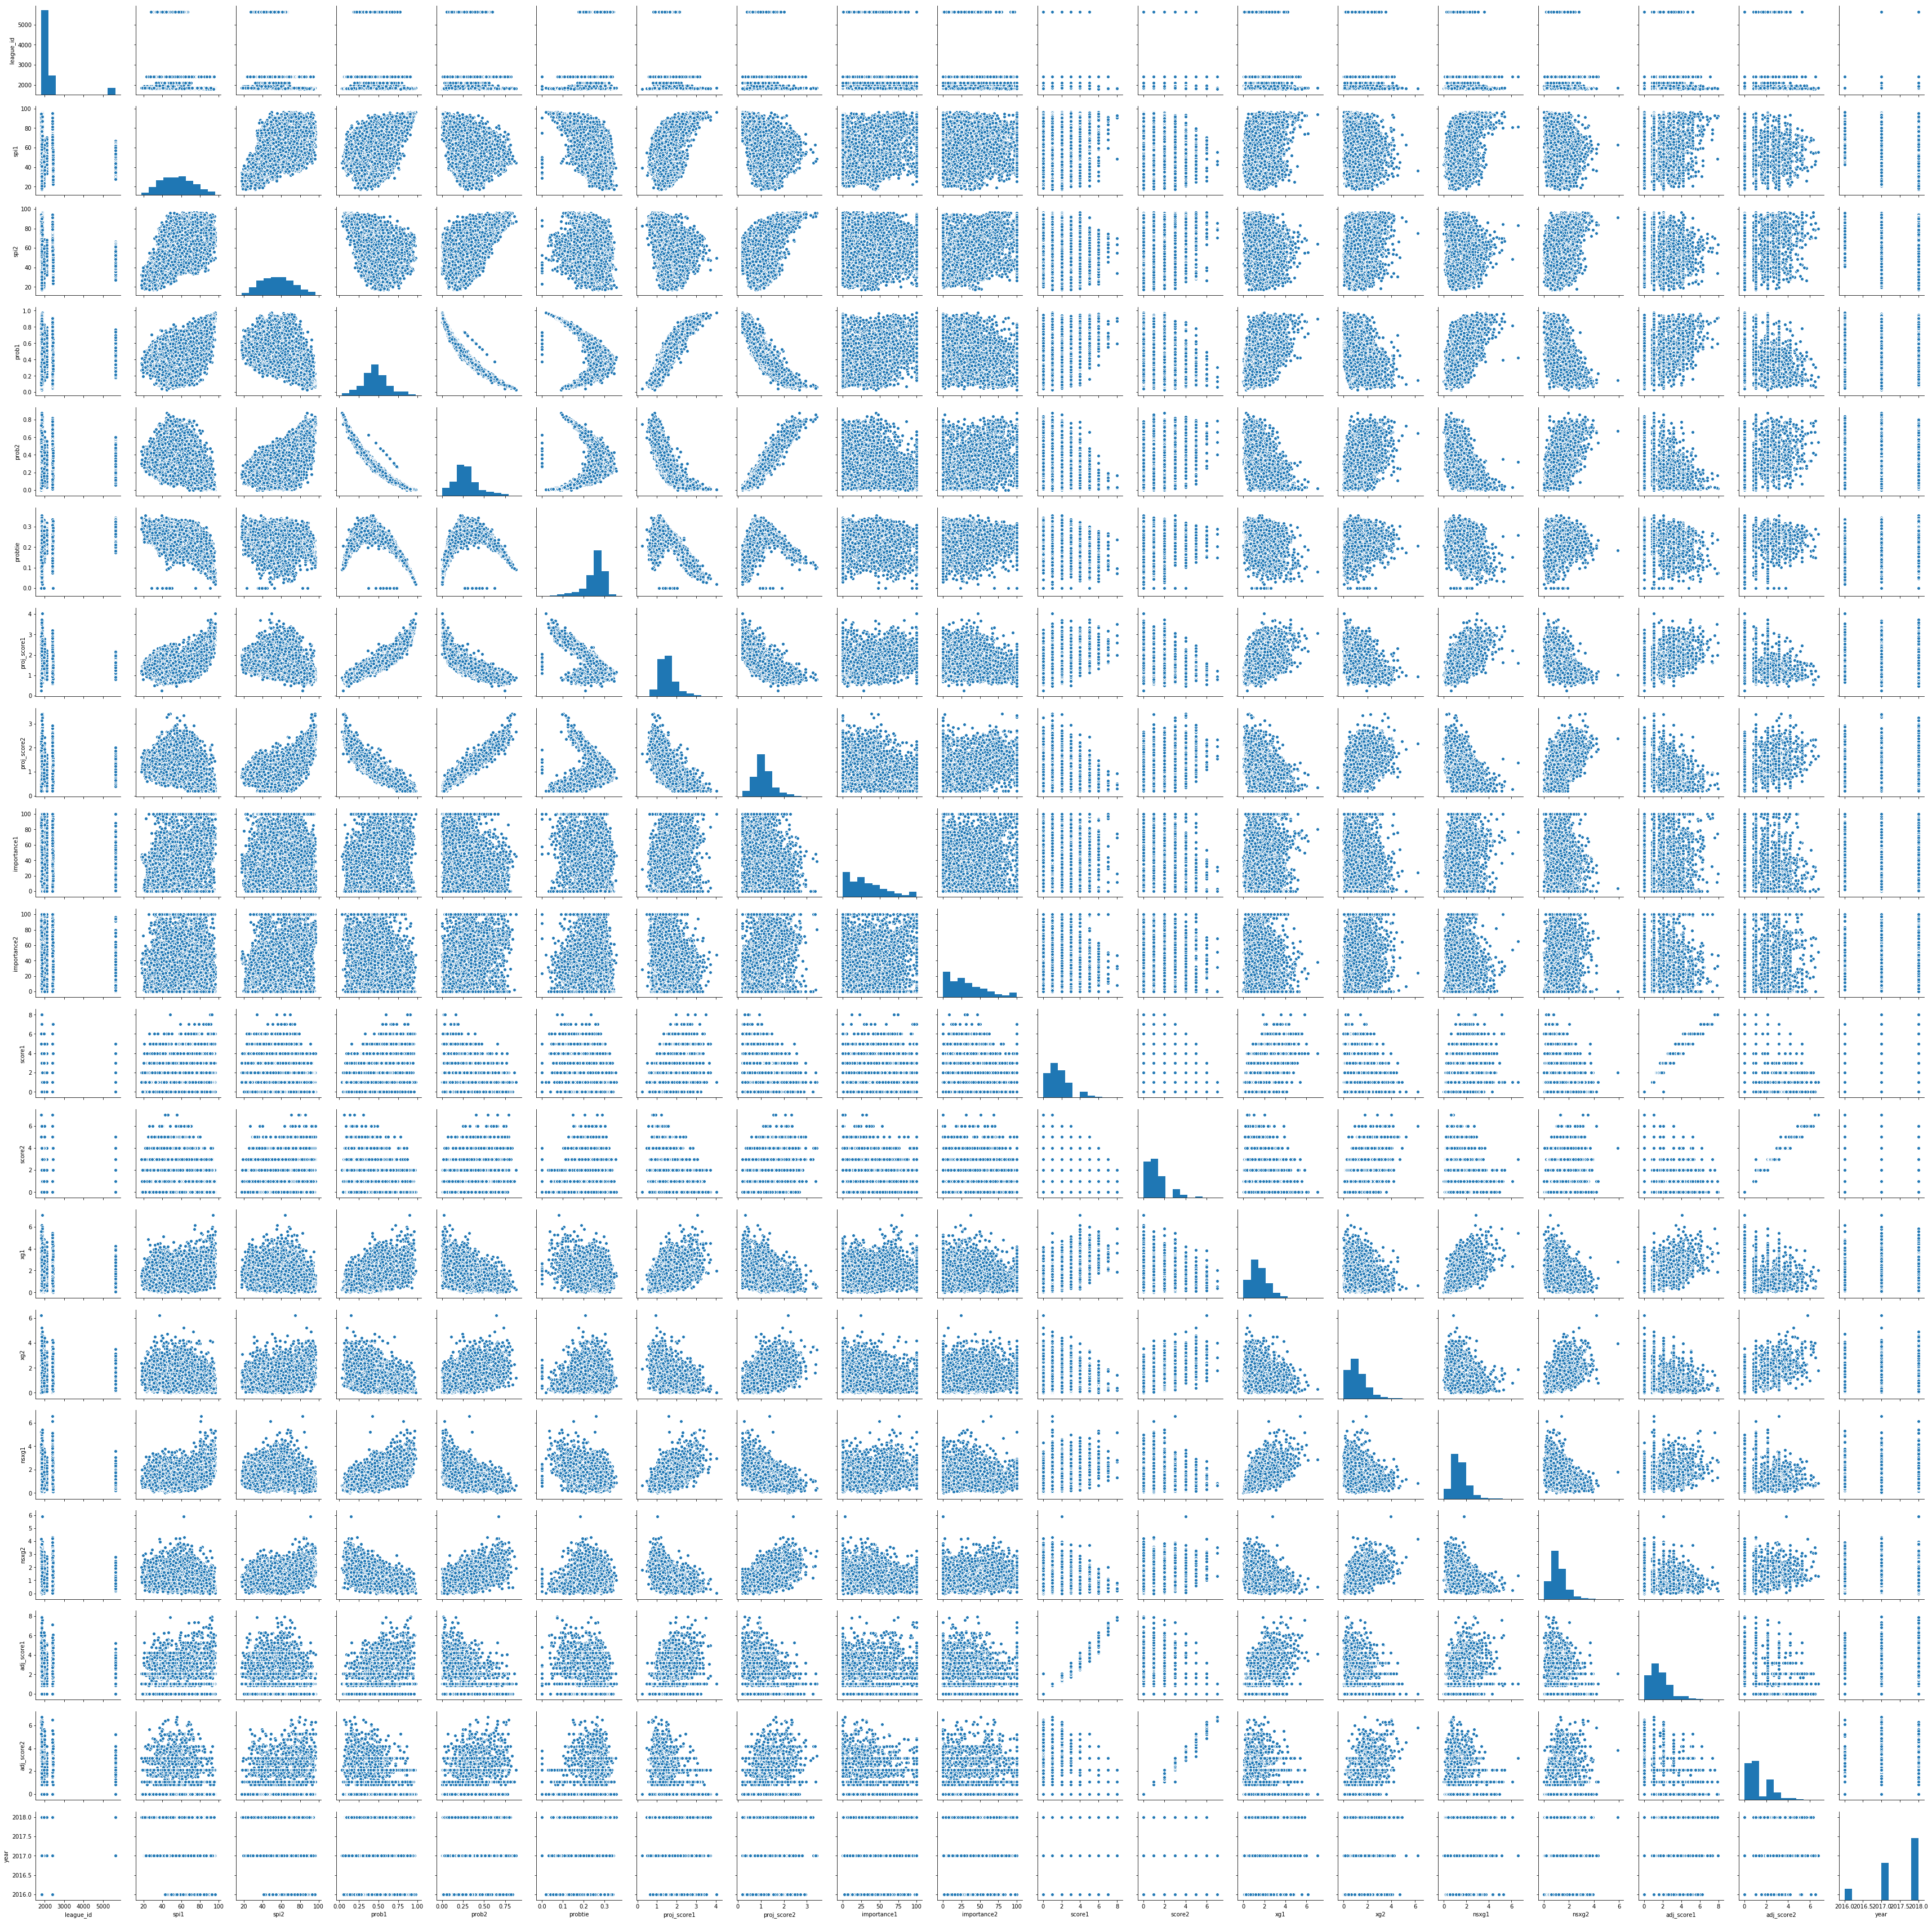

In [13]:
sns.pairplot(df, kind="scatter")
plt.show()

In [14]:
df1 = pd.DataFrame( columns=['spi1', 'spi2', 'score1','score2'])

In [15]:
df1['spi1'] = df['spi1'].values
df1['spi2'] = df['spi2'].values
df1['score1'] = df['score1'].values
df1['score2'] = df['score2'].values
df1.head()

spi1   spi2  score1  score2
0  51.16  85.68     0.0     1.0
1  68.85  56.48     2.0     2.0
2  53.57  66.81     2.0     1.0
3  58.98  59.74     0.0     1.0
4  56.32  60.35     1.0     1.0

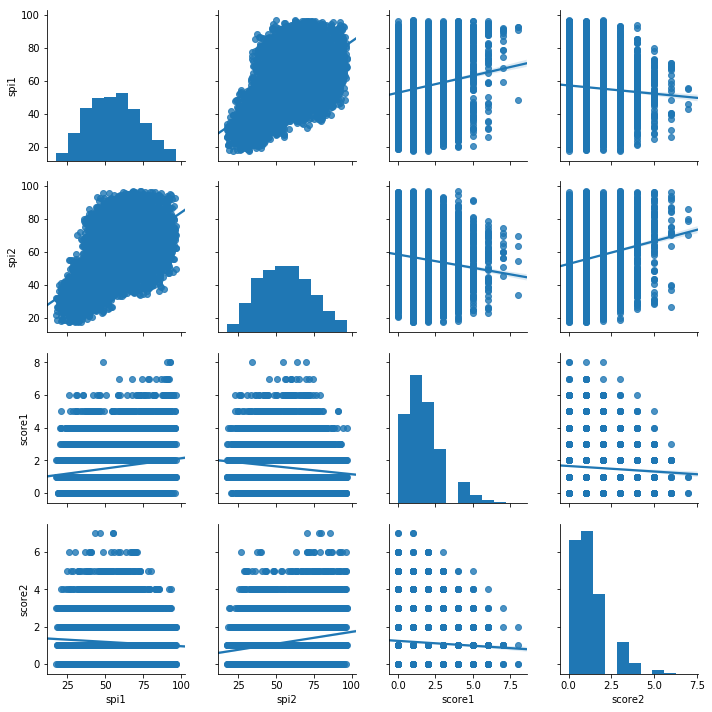

In [16]:
sns.pairplot(df1, kind="reg")
plt.show()

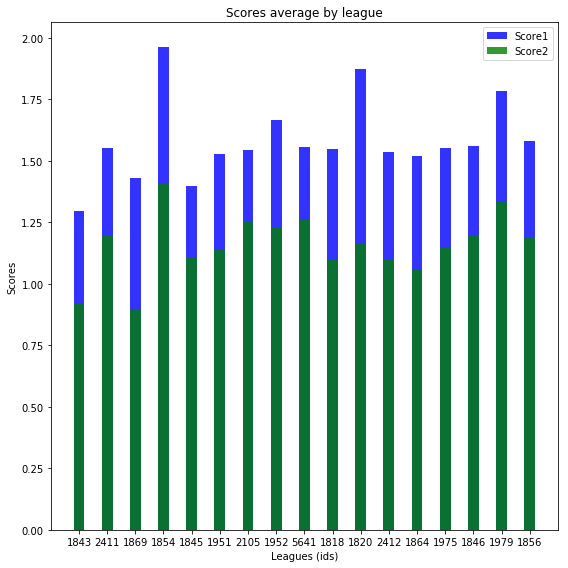

In [69]:
# Mean score by league 

n_groups = len(df.groupby('league')['score1'].mean())

# create plot
fig = plt.figure(1, figsize=(8,8))
#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.38
opacity = 0.8
 
rects1 = plt.bar(index, df.groupby('league')['score1'].mean(), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Score1')
 
rects2 = plt.bar(index, df.groupby('league')['score2'].mean(), bar_width,
                 alpha=opacity,
                 color='g',
                 label='Score2')
 
plt.xlabel('Leagues (ids)')
plt.ylabel('Scores')
plt.title('Scores average by league')
plt.xticks(index, df['league_id'].unique())
plt.legend()
 
plt.tight_layout()
plt.show()

In [43]:
#df.dtypes
df['year'] = pd.DatetimeIndex(df['date']).year